# Music genre Classification

## Using KNN classifiers on extracted feature vectors

In [1]:
import numpy as np
import sklearn as skl
import matplotlib.pylab as plt
get_ipython().magic('matplotlib inline')

## Import normalized featuers

In [2]:
data = np.load('normalized.npy')
np.shape(data)

(1000, 1200)

In [3]:
labels = np.load('labels.npy')
np.shape(labels)
dic_labels = dict(enumerate(np.unique(labels)))
inv_dic_labels = {dic_labels[i]: i for i in dic_labels.keys()}
print('genres : ' + str(dic_labels))
Y_cls = np.array([inv_dic_labels[y] for y in labels])
print('\nsome Y_cls : ' + str(Y_cls[::20]))
Y = np.array([[0]*i+[1]+[0]*(9-i) for i in Y_cls])
print('\nsome Y :\n' + str(Y[::50]))

genres : {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}

some Y_cls : [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]

some Y :
[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]]


In [4]:
### select the class to train against all
#######################################
class_to_train = 'classical'
#######################################
n_class_to_train = inv_dic_labels[class_to_train]

train_index = np.zeros(1000)
train_index[::10] = np.ones(100)
train_index[(n_class_to_train*100):(n_class_to_train*100+100)] = np.ones(100)
train_index[(n_class_to_train*100):(n_class_to_train*100+100):10] = np.zeros(10)

data_train = np.array([data[i] for i in range(1000) if train_index[i] == 1])
Y_cls_train = np.array([Y_cls[i] for i in range(1000) if train_index[i] == 1])
print('\nsome Y_cls_train : ' + str(Y_cls_train[::20]))
Y_train = np.array([Y[i] for i in range(1000) if train_index[i] == 1])

data_test = np.array([data[i] for i in range(1000) if train_index[i] == 0])
Y_cls_test = np.array([Y_cls[i] for i in range(1000) if train_index[i] == 0])
print('\nsome Y_cls_test : ' + str(Y_cls_test[::20]))
Y_test = np.array([Y[i] for i in range(1000) if train_index[i] == 0])

print('\nTraining set : ' + str(np.shape(data_train)))
print('\t' + class_to_train + ' : ' + str(sum(Y_train[:,n_class_to_train])))
print('\tnon-' + class_to_train + ' : ' + str(len(Y_train) - sum(Y_train[:,n_class_to_train])))
print('\nTest set : ' + str(np.shape(data_test)))
print('\t' + class_to_train + ' : ' + str(sum(Y_test[:,n_class_to_train])))
print('\tnon-' + class_to_train + ' : ' + str(len(Y_test) - sum(Y_test[:,n_class_to_train])))


some Y_cls_train : [0 1 1 1 1 2 4 6 8]

some Y_cls_test : [0 0 0 0 0 2 2 2 2 2 3 3 3 3 4 4 4 4 4 5 5 5 5 6 6 6 6 6 7 7 7 7 8 8 8 8 8
 9 9 9 9]

Training set : (180, 1200)
	classical : 90
	non-classical : 90

Test set : (820, 1200)
	classical : 10
	non-classical : 810


## Useful functions

In [5]:
from matplotlib import cm

def cls2col(cls=Y_cls):
    return cm.rainbow([c / max(cls) for c in cls])

In [6]:
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
import matplotlib

def custom_scatter_matrix(X, genre='classical', Y_cls=Y_cls):
    plt.figure(figsize=(15,10))
    n=np.shape(X)[1]
    df = pd.DataFrame(X[:,:n], columns=['PC'+str(i+1) for i in range(n)])
    axarr = scatter_matrix(df, alpha=0.3, s=100, color=cls2col(Y_cls==1), figsize=(15, 10), diagonal='none')
    for i in range(n):
            y = np.array(df[Y_cls == inv_dic_labels[genre]].values)[:,i]
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[i][i].plot(ind, gkde.evaluate(ind), color='red')
            
            y = np.array(df[Y_cls != inv_dic_labels[genre]].values)[:,i]
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[i][i].plot(ind, gkde.evaluate(ind), color='purple')

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def confusion_tot(cm):
    cm = np.array([list(cm[i,:]) + [np.sum(cm[i,:])] for i in range(np.shape(cm)[0])])
    last_line = [np.sum(cm[:,i]) for i in range(np.shape(cm)[1] - 1)]
    last_line = last_line + [np.sum(last_line)]
    cm = np.concatenate((cm,np.array([last_line])), axis=0)
    return cm

def confusion_prob(cm):
    prob = np.zeros(np.shape(cm))
    prob[:-1,:-1] = 100 * cm[:-1,:-1] / np.sum(cm[:-1,:-1])
    prob[:-1,-1] = 100 * np.diag(cm[:-1,:-1]) / np.sum(cm[:-1,:-1], axis=1)
    prob[-1,:-1] = 100 * np.diag(cm[:-1,:-1]) / np.sum(cm[:-1,:-1], axis=0)
    prob[-1,-1] = 100 * np.sum(np.diag(cm[:-1,:-1])) / np.sum(cm[:-1,:-1])
    return prob

def plot_confusion_matrix(y, y_pred, title='Confusion matrix', cmap=plt.cm.Oranges, display=True):
    dim = max(len(np.unique(y)), len(np.unique(y_pred)))
    cm = confusion_matrix(y, y_pred)
    cm_red = np.zeros((len(cm)+1,len(cm)+1))
    cm_red[:-1,:-1] = confusion_prob(cm)
    cm = confusion_tot(cm)
    cm_prob = confusion_prob(cm)
    if display:
        plt.figure(figsize=(15,1.5*(dim+1)))
        plt.imshow(cm_prob, interpolation='nearest', cmap=cmap)
        plt.title(title + ' - accuracy : {:.2f}%'.format(cm_prob[-1,-1]))
        plt.colorbar()
        tick_marks = np.arange(len(cm))
        plt.xticks(tick_marks, list(np.unique(y)) + ['Total'], rotation=45)
        plt.yticks(tick_marks, list(np.unique(y)) + ['Total'])
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, '{:.0f}\n({:.2f}%)'.format(cm[i, j],cm_prob[i, j]), horizontalalignment="center", size=12, color="green" if i == j or i+1 == len(cm) or j+1 == len(cm) else "red")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    if not display:
        return 100 * np.sum(np.diag(cm))/ np.sum(cm)

In [8]:
def compute_accuracy(Y_pred, Y_true):
    return np.mean(Y_pred == Y_true)

## Dimensional reduction

### PCA

n_components to keep 50.0% of the variance : 59
shape of dim reducted data : (1000, 59)


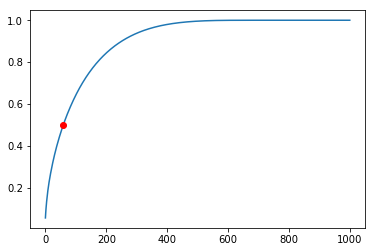

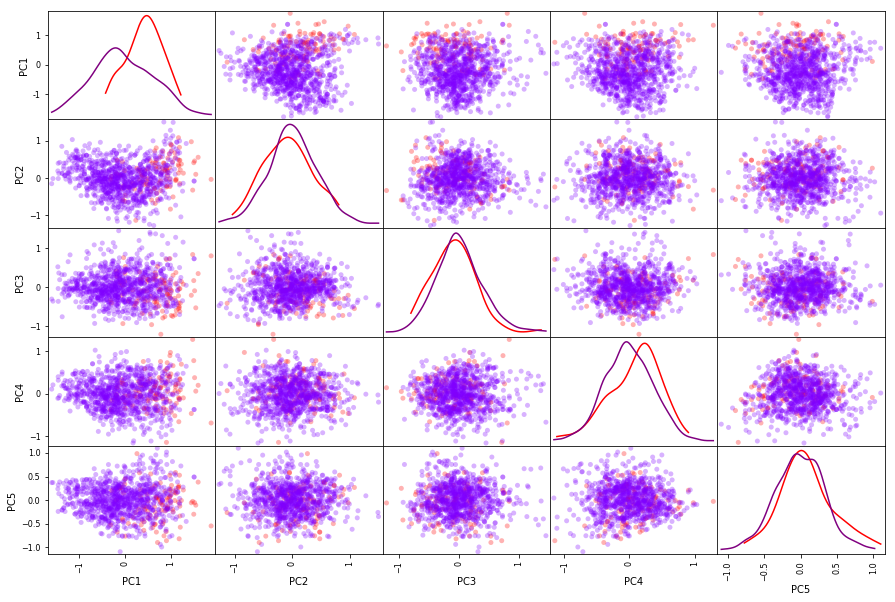

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
cumvar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumvar)
##########################
## choose variance to keep
var_th = 0.5
##########################
for i in range(len(cumvar)):
    if cumvar[i] >= var_th:
        n_comp = i
        break
print('n_components to keep {}% of the variance : {}'.format(var_th*100, n_comp))
X_pca = pca.transform(data)[:,:n_comp]
print('shape of dim reducted data : ' + str(np.shape(X_pca)))
plt.plot(n_comp, var_th, 'or', markersize=6)


##########################
## choose genre to plot
genre = 'country'
plot_comp = 5
##########################
custom_scatter_matrix(X_pca[:,:min(plot_comp, n_comp)], genre, Y_cls)

In [10]:
def get_PCA(X):
    return pca.transform(X)[:,:59]

X_train_pca = get_PCA(data_train)
X_test_pca = get_PCA(data_test)

### LDA

In [21]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

### select genre
#################
n = 5 # components
genre = 'classical'
one_against_all = True
n_plot = 10
#################

lda = LDA(n_topics=n, learning_method='online', random_state=2)
if one_against_all:
    lda.fit(data, Y_cls==1) # ask to dissociate classical and non-classical
else:
    lda.fit(data, Y_cls) # dissociate all genres

In [12]:
X_lda = lda.transform(data)
print('shape of dim reducted data : ' + str(np.shape(X_lda)))

shape of dim reducted data : (1000, 5)


In [13]:
plt.figure(figsize=(15,10))
plt.scatter(X_lda[:,0], X_lda[:,1], c=cls2col(Y[:,1]))

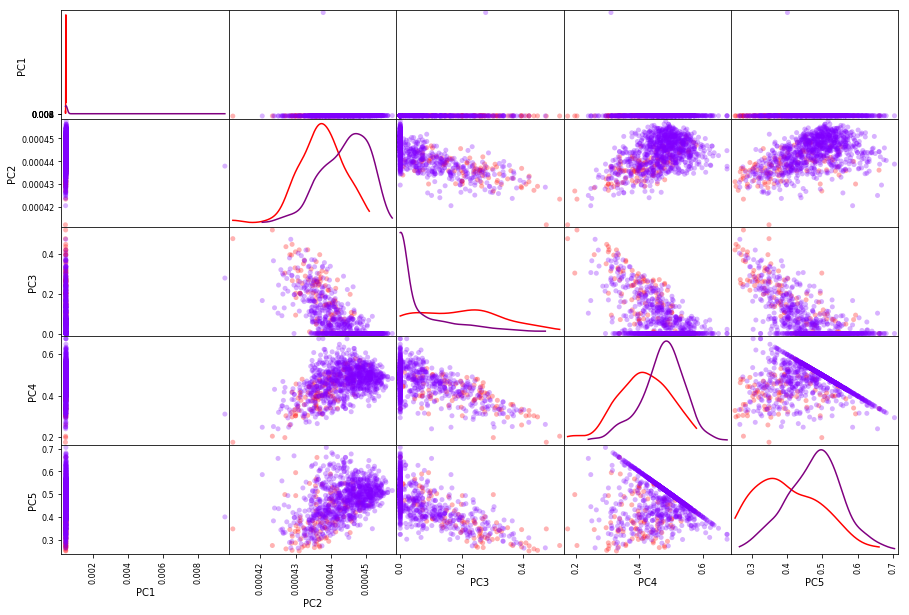

In [14]:
custom_scatter_matrix(X_lda[:,:min(n, n_plot)], genre, Y_cls)


# We delete the first component, not only because as huge outliers but because, once these outliers removed, this component appears to be extremely correlated with the second one.

In [15]:
X_lda = X_lda[:,-4:]
np.shape(X_lda)

(1000, 4)

In [16]:
def get_LDA(X):
    return lda.transform(X)[:,-4:]

X_train_lda = get_LDA(data_train)
X_test_lda = get_LDA(data_test)

## Classification

### K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

def knn_class(X, Y):
    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X, Y)
    return knn.predict, knn.predict_proba

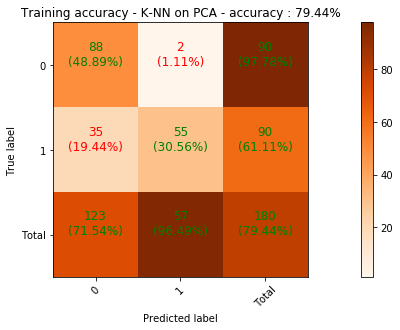

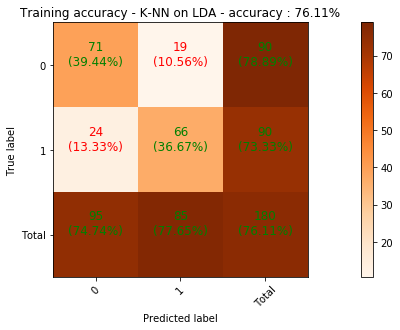

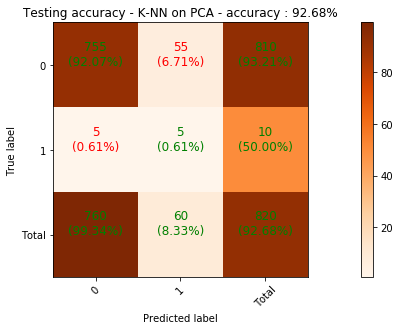

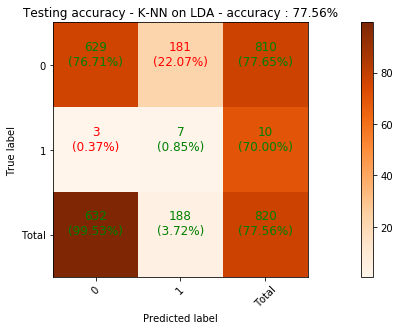

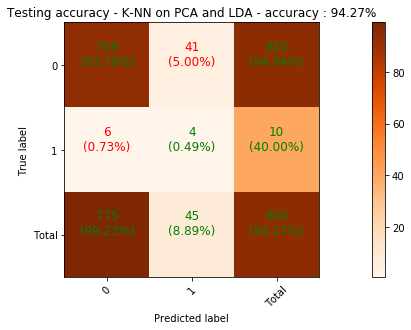

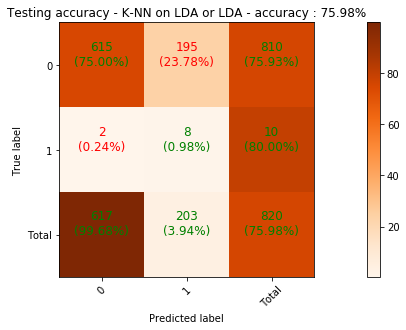

In [18]:
knn_pca, knn_pca_prob = knn_class(X_train_pca, Y_train[:,1])
knn_lda, knn_lda_prob = knn_class(X_train_lda, Y_train[:,1])

Y_train_knn_pca = knn_pca(X_train_pca)
Y_train_knn_lda = knn_lda(X_train_lda)

Y_test_knn_pca = knn_pca(X_test_pca)
Y_test_knn_lda = knn_lda(X_test_lda)

plot_confusion_matrix(Y_train[:,1], Y_train_knn_pca, 'Training accuracy - K-NN on PCA')
plot_confusion_matrix(Y_train[:,1], Y_train_knn_lda, 'Training accuracy - K-NN on LDA')

plot_confusion_matrix(Y_test[:,1], Y_test_knn_pca, 'Testing accuracy - K-NN on PCA')
plot_confusion_matrix(Y_test[:,1], Y_test_knn_lda, 'Testing accuracy - K-NN on LDA')

Y_test_knn_pca_and_lda = [Y_test_knn_pca[i] * Y_test_knn_lda[i] for i in range(len(Y_test_knn_lda))]
Y_test_knn_pca_or_lda = [min(1,Y_test_knn_pca[i] + Y_test_knn_lda[i]) for i in range(len(Y_test_knn_lda))]

plot_confusion_matrix(Y_test[:,1], Y_test_knn_pca_and_lda, 'Testing accuracy - K-NN on PCA and LDA')
plot_confusion_matrix(Y_test[:,1], Y_test_knn_pca_or_lda, 'Testing accuracy - K-NN on LDA or LDA')

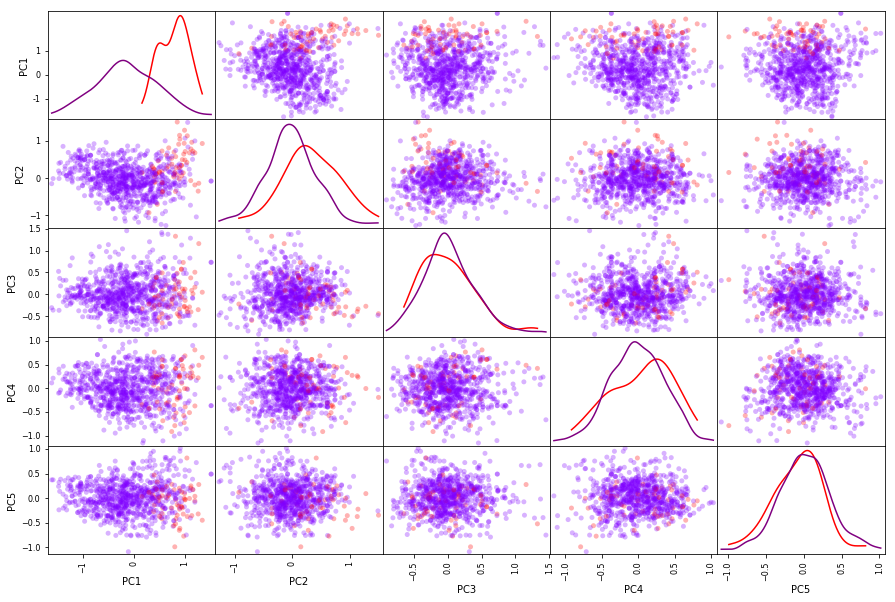

In [19]:
custom_scatter_matrix(X_test_pca[:,:5], genre, Y_test_knn_pca)

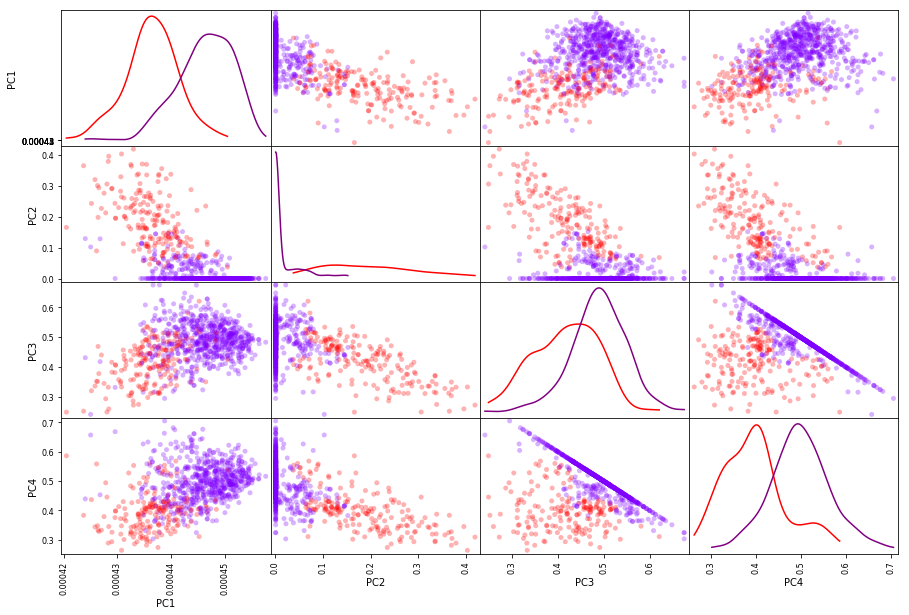

In [20]:
custom_scatter_matrix(X_test_lda[:,:5], genre, Y_test_knn_lda)